In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

print('setup')

setup


In [581]:
data = pd.read_csv('data/train.csv', low_memory=False)

df = data[['Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio']]

def dirty_data(df):
    dirty = []
    columns = df.columns
    for col in columns:
        dtype = df[col].dtypes
        nunique = df[col].nunique()
        null = df[col].isnull().sum()
        duplicates = df[col].duplicated().sum()
        dirty.append([col,dtype,nunique,null,duplicates])
    df_dirty_data_finding = pd.DataFrame(dirty)
    df_dirty_data_finding.columns = ['column','dtype','nunique','null','duplicates']
    return df_dirty_data_finding

def cleaning_Null_columns(df_column):
  df_column.fillna(-99999, inplace = True)
  return df_column.value_counts(dropna = False)

def fix_nums(num):
    try : 
        return float(num.replace("_",""))
    except :
        return np.NaN
 

        
def plot_boxplots(df, ncols=3, color="", figsize=(10, 10)):
    try :
        # Calculate number of rows and columns
        nrows = (len(df.columns) - 1) // ncols + 1
        
        # Create figure and subplots
        fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
        
        # Loop through columns and plot boxplot
        for i, column in enumerate(df.columns):
            ax = axes.flat[i]
            sns.boxplot(df[column], ax=ax, color=color, whis=1.5, saturation=0.5, width=0.5, orient='h', notch=True, showcaps=False)
            ax.axvline(df[column].median(), color='r', linestyle='--')
            ax.set_title(column)
            ax.legend([f'Median: {df[column].median():.2f}'], loc='best')
        
        for ax in axes.flat:
            ax.grid(True)
        
        # Remove any unused axes
        if len(df.columns) % ncols != 0:
            for i in range(len(df.columns) % ncols, ncols):
                fig.delaxes(axes.flat[-i])
        
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error: {e}")
        
        
def process_column(df_column):
    try:
        # Calculate the 95 percentile
        q95 = data[df_column.name].quantile(0.95)

        # Replace values above the 95 percentile with the median value
        df_test = data[data[df_column.name] <= q95][df_column.name]
        median_col = int(df_test.median())

        data.loc[data[df_column.name] > q95, df_column.name] = median_col
        data.loc[data[df_column.name] == -99999, df_column.name] = median_col  
        
    except Exception as e:
        print(f"Error: {e}")      


def df_process_data(df):
    try:
        processed = []
        columns = df.columns
        for col in columns:
            # Check for outliers and replace with median
            q95 = df[col].quantile(0.95).round(1)
            df_test = df[df[col] <= q95][col]
            median_col = int(df_test.median())
            df.loc[df[col] > q95, col] = median_col
            df.loc[df[col] == -99999, col] = median_col
            processed.append([col,q95,median_col])
        df_processed_data_finding = pd.DataFrame(processed, columns=['column','quantile95','median_col'])
        return df_processed_data_finding
    except Exception as e:
        print(f"Error: {e}")
        


In [582]:
dirty_data(df)

,column,dtype,nunique,null,duplicates
0,Delay_from_due_date,int64,73,0,99927
1,Num_of_Delayed_Payment,object,749,7002,99250
2,Changed_Credit_Limit,object,4384,0,95616
3,Num_Credit_Inquiries,float64,1223,1965,98776
4,Credit_Mix,object,4,0,99996
5,Outstanding_Debt,object,13178,0,86822
6,Credit_Utilization_Ratio,float64,100000,0,0


In [583]:
data['Credit_Mix'] = pd.factorize(data['Credit_Mix'], sort=True)[0]
data['Credit_Mix'] = data['Credit_Mix'].astype(int)

num_to_fix = ['Num_of_Delayed_Payment', 'Changed_Credit_Limit','Outstanding_Debt']

for col in num_to_fix :
    data[col] = data[col].apply(fix_nums)
    
cleaning_Null_columns(data['Num_of_Delayed_Payment'])
cleaning_Null_columns(data['Changed_Credit_Limit'])
cleaning_Null_columns(data['Num_Credit_Inquiries'])
# dirty_data_finding(df)

df = data[['Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio']]

dirty_data(df)

,column,dtype,nunique,null,duplicates
0,Delay_from_due_date,int64,73,0,99927
1,Num_of_Delayed_Payment,float64,712,0,99288
2,Changed_Credit_Limit,float64,4384,0,95616
3,Num_Credit_Inquiries,float64,1224,0,98776
4,Credit_Mix,int32,4,0,99996
5,Outstanding_Debt,float64,12203,0,87797
6,Credit_Utilization_Ratio,float64,100000,0,0


<br>
<br>

# Box plot

 

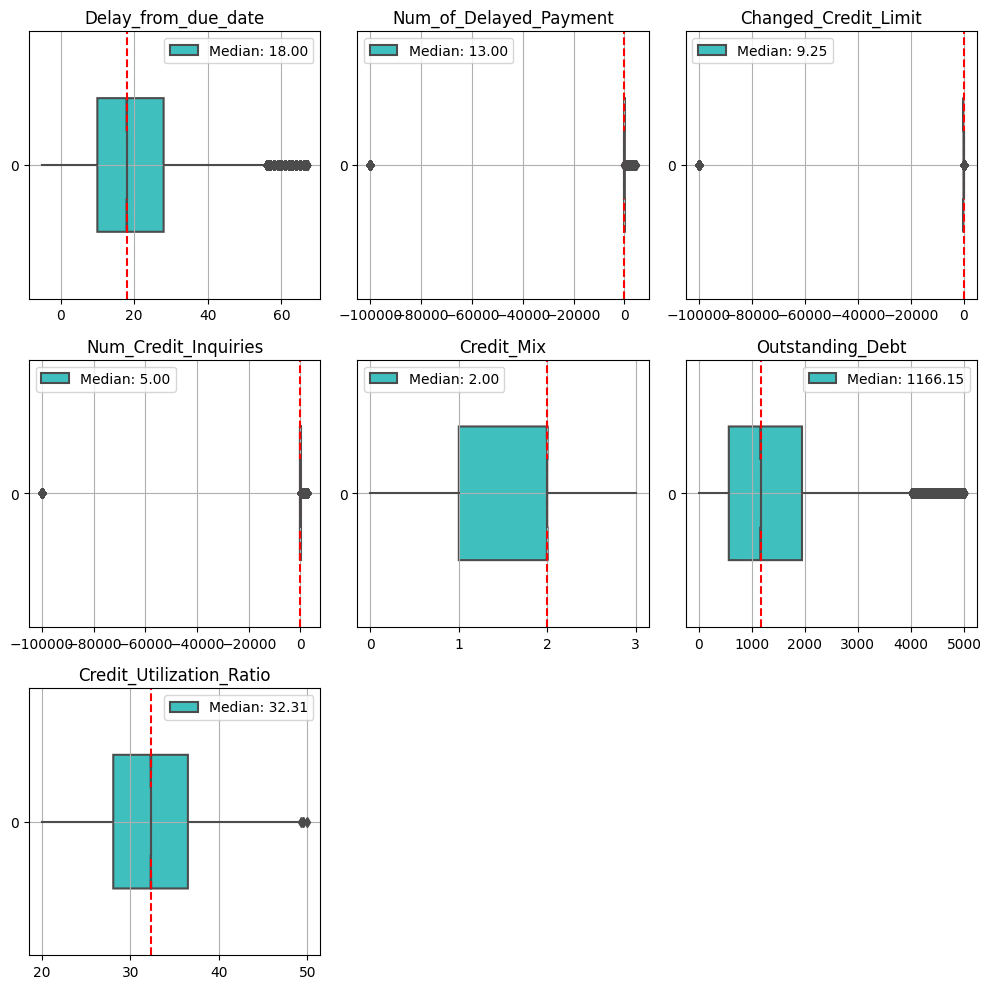

In [584]:
plot_boxplots(df,  ncols=3, color='cyan')

<br>


## Processed Data

In [585]:
df_processed = df.apply(process_column)
df_process_data(df)

,column,quantile95,median_col
0,Delay_from_due_date,54.0,17
1,Num_of_Delayed_Payment,23.0,12
2,Changed_Credit_Limit,23.5,8
3,Num_Credit_Inquiries,13.0,5
4,Credit_Mix,3.0,2
5,Outstanding_Debt,4073.8,1103
6,Credit_Utilization_Ratio,40.2,31


<br>

## Box plot processed data

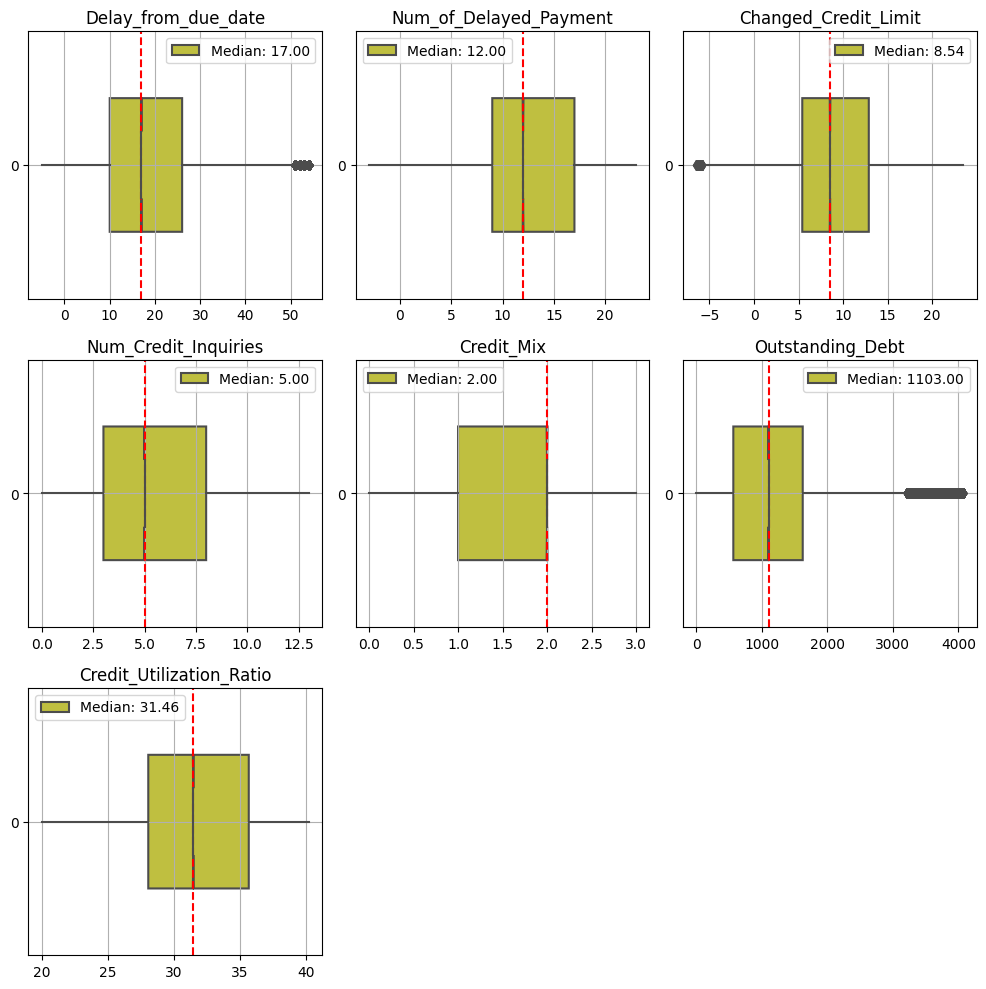

In [589]:
plot_boxplots(df,  ncols=3, color='yellow')

In [402]:
# df.to_csv("data/process_data_juan.csv", index = False)

# juan = pd.read_csv("data/process_data.csv")
# del juan['Unnamed: 0']
# juan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Delay_from_due_date       100000 non-null  int64  
 1   Num_of_Delayed_Payment    100000 non-null  float64
 2   Changed_Credit_Limit      100000 non-null  float64
 3   Num_Credit_Inquiries      100000 non-null  float64
 4   Credit_Mix                100000 non-null  float64
 5   Outstanding_Debt          100000 non-null  float64
 6   Credit_Utilization_Ratio  100000 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 5.3 MB


<br>
<br>
<br>

# Model

In [9]:
# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from datasist.structdata import detect_outliers
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
import category_encoders as ce
import re 

# Modeling and evaluation 
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import (
    BaggingClassifier,
    ExtraTreesClassifier,
    RandomForestClassifier,
    StackingClassifier,
    HistGradientBoostingClassifier
)
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Load the dataset
df = pd.read_csv("v2_train.csv")

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Credit_Score', axis=1), df['Credit_Score'], test_size=0.3, random_state=42)

# Create model with Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model with the training set
rf.fit(X_train, y_train)

# Predict the values of the target variable for the test set
y_pred = rf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('The accuracy of the model is: {:.2f}%'.format(accuracy*100))


La precisión del modelo es: 78.67%


#  Model 2

In [10]:
# define dataset
X, y = df.drop("Credit_Score",axis=1).values , df["Credit_Score"] 
y.value_counts(normalize=True)

2    0.53174
1    0.28998
3    0.17828
Name: Credit_Score, dtype: float64

In [11]:
y.value_counts(normalize=True)

2    0.53174
1    0.28998
3    0.17828
Name: Credit_Score, dtype: float64

In [12]:
from imblearn.over_sampling import SMOTE
rus = SMOTE(sampling_strategy='auto')
X_data_rus, y_data_rus = rus.fit_resample(X, y)

In [13]:
y_data_rus.value_counts(normalize=True)

3    0.333333
2    0.333333
1    0.333333
Name: Credit_Score, dtype: float64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_data_rus, y_data_rus, test_size=0.3, random_state=42,stratify=y_data_rus)

In [15]:
scalar = PowerTransformer(method='yeo-johnson', standardize=True).fit(X_train)

In [16]:
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

In [17]:
bagging = BaggingClassifier(n_jobs=-1)
extraTrees = ExtraTreesClassifier(max_depth=10, n_jobs=-1)
randomForest = RandomForestClassifier(n_jobs=-1)
histGradientBoosting = HistGradientBoostingClassifier()
XGB = XGBClassifier(n_jobs=-1)

model = StackingClassifier([
    ('bagging', bagging),
    ('extraTress', extraTrees),
    ('randomforest', randomForest),
    ('histGradientBoosting', histGradientBoosting),
    ('XGB', XGB)
], n_jobs=-1)

In [18]:
model.fit(X_train, y_train)

C:\Users\jdor1\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


StackingClassifier(estimators=[('bagging', BaggingClassifier(n_jobs=-1)),
                               ('extraTress',
                                ExtraTreesClassifier(max_depth=10, n_jobs=-1)),
                               ('randomforest',
                                RandomForestClassifier(n_jobs=-1)),
                               ('histGradientBoosting',
                                HistGradientBoostingClassifier()),
                               ('XGB',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None...
                                              gpu_id=None, grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=100, n_jobs=-1,
                                              num_parallel_tree=None,
                                              predictor=None, random_state=None, ...))],
                   n_jobs=-1)

In [19]:
print("Train Score: ",model.score(X_train, y_train))

Train Score:  0.9995253660502396


In [20]:
print("Test Score:",model.score(X_test, y_test))

Test Score: 0.8551727020080657


In [21]:
y_pred = model.predict(X_test)

In [22]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.86      0.87      0.86     15771
           2       0.81      0.81      0.81     15815
           3       0.90      0.89      0.89     16271

    accuracy                           0.86     47857
   macro avg       0.86      0.85      0.85     47857
weighted avg       0.86      0.86      0.86     47857

